# Recommender System
This Matlab code has been completed as part of [Machine Learning](https://www.coursera.org/learn/machine-learning)
course in Coursera given by Prof. Andrew Ng

------------
This note demonstrates the implementation of an anomaly detection algorithm to detect failing servers on a network.

This notebook includes:
- <a href='#part1'>Part 1: Two-dimensional Outliers</a>
- <a href='#part2'>Part 2: Multidimensional Outliers</a>

This code requires the following functions
* <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_10_AnomalyDetection_multivariateGaussian.m'>funcs_10_AnomalyDetection_multivariateGaussian.m</a> 
* <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_10_AnomalyDetection_visualizeFit.m'>funcs_10_AnomalyDetection_visualizeFit.m</a> 
* <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_10_AnomalyDetection_selectThreshold.m'>funcs_10_AnomalyDetection_selectThreshold.m</a> 

In [43]:
clear all; close all; clc; warning off;
addpath('../data/') % add path to directory containing data files
addpath('./funcs/') % add path to directory containing subfunction files

## Part 1: Two-dimensional Outliers <a id='part1'></a>

This part will use an anomaly detection algorithm to detect anomalous behavior in server computers. The features measure the through-put (mb/s) and latency (ms) of response of each server. While the servers were operating, m = 307 examples of how they were behaving are collected, and thus have an unlabeled dataset $x^{(1)} , . . . , x^{(m)}$. We suspect that the vast majority of these examples are "normal" (non-anomalous) examples of the servers operating normally, but there might also be some examples of servers acting anomalously within this dataset. 

We will use a Gaussian model to detect anomalous examples in the dataset. We will first start on a 2D dataset that will allow you to visualize what the algorithm is doing. On that dataset we will fit a Gaussian distribution and then find values that have very low probability and hence can be considered anomalies. After that, we will apply the anomaly detection algorithm to a larger dataset with many dimensions.

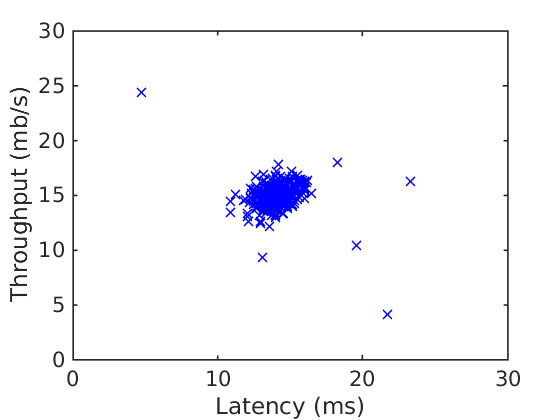

In [44]:
load('data_10_AnomalyDetection_data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bx');
axis([0 30 0 30]);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');

### Gaussian distribution
To perform anomaly detection, we will first need to fit a model to the data’s distribution. Given a training set $\{x^{(1)} , ..., x^{(m)} \}$ (where $x^{(i)} \in R^n$ ), we want to estimate the Gaussian distribution for each of the features $x_i$ . For each feature i = 1 . . . n, we need to find parameters $\mu_i$ and $\sigma_i^2$ that fit the data in the i-th dimension $\{x^{(1)} , ..., x^{(m)} \}$ (the i-th dimension of each example).
The Gaussian distribution is given by

$$p(x;\mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}exp \left( -\frac{(x-\mu)^2}{2\sigma^2} \right)$$

where $\mu$ is the mean and $\sigma^2$ controls the variance.

### Estimate the dataset statistics
We assume a Gaussian distribution for the dataset. We first estimate the parameters of our assumed Gaussian distribution, then compute the probabilities for each of the points and then visualize both the overall distribution and where each of the points falls in terms of that distribution.

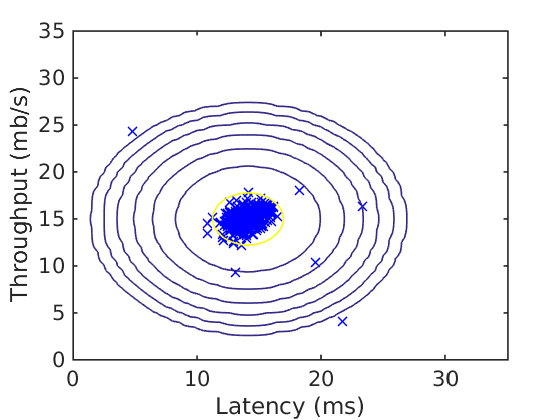

In [45]:
% Estimate mean and std of the Gaussian distribution
[m, n] = size(X);
mu = mean(X, 1);
sigma2 = mean((X-repmat(mu,m,1)).^2,1);

%  Returns the density of the multivariate normal at each data point (row) of X
p = funcs_10_AnomalyDetection_multivariateGaussian(X, mu, sigma2);

funcs_10_AnomalyDetection_visualizeFit(X,  mu, sigma2);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');

## Selecting the threshold, ε
After estimating the Gaussian parameters, we can investigate which examples have a very high probability given this distribution and which examples have a very low probability. The low probability examples are more likely to be the anomalies in our dataset. One way to determine which examples are anomalies is to select a threshold based on a cross validation set. 

We will implement an algorithm to select the threshold $\epsilon$ using the * **F1-score** * on a cross validation set. This is done using <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_10_AnomalyDetection_selectThreshold.m'>funcs_10_AnomalyDetection_selectThreshold.m</a>. For this, we will use a cross validation set $\{(x_{CV}^1 , y_{CV}^1), . . . , (x_{CV}^{m_{CV}} , y_{CV}^{m_{CV}})\}$, where the label y = 1 corresponds to an anomalous example, and y = 0 corresponds to a normal example. For each cross validation example, we will compute $p(x_{CV}^{(i)})$. The vector of all of these probabilities $p(x_{CV}^{(i)}),...,p(x_{CV}^{m_{CV}})$ is passed to <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_10_AnomalyDetection_selectThreshold.m'>funcs_10_AnomalyDetection_selectThreshold.m</a> in the vector *pval*. The corresponding labels $y_{CV}^{(i)},...,y_{CV}^{m_{CV}}$ is passed to the same function in the vector *yval*. 

The function <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_10_AnomalyDetection_selectThreshold.m'>funcs_10_AnomalyDetection_selectThreshold.m</a> should return two values: the first is
the selected threshold $\epsilon$. If an example x has a low probability $p(x) < \epsilon$, then it is considered to be an anomaly. The function should also return the * **F1-score** *, which tells you how well you’re doing on finding the ground truth anomalies given a certain threshold. For many different values of $\epsilon$, you will compute the resulting * **F1-score** * by computing how many examples the current threshold classifies correctly and incorrectly.

The * **F1-score** * is computed using precision (prec) and recall (rec):

$$F1 = \frac{2*prec*rec}{prec+rec}$$

Precision and recall are estimated as:

$$prec=\frac{tp}{tp+fp}$$

$$rec=\frac{tp}{tp+fn}$$

where
* $tp$ is the number of true positives: the ground truth label says it’s an anomaly and our algorithm correctly classified it as an anomaly.
* $fp$ is the number of false positives: the ground truth label says it’s not an anomaly, but our algorithm incorrectly classified it as an anomaly.
* $fn$ is the number of false negatives: the ground truth label says it’s an anomaly, but our algorithm incorrectly classified it as not being anomalous.

In <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_10_AnomalyDetection_selectThreshold.m'>funcs_10_AnomalyDetection_selectThreshold.m</a>, there is a loop that will try many different values of $\epsilon$ and select the best one based on the * **F1-score** *. 

We will run your anomaly detection code and circle the anomalies in the plot (in red).

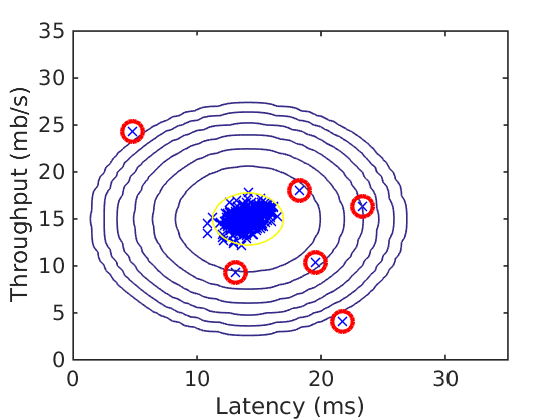

Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set:  0.875000

In [46]:
pval = funcs_10_AnomalyDetection_multivariateGaussian(Xval, mu, sigma2);

[epsilon F1] = funcs_10_AnomalyDetection_selectThreshold(yval, pval);
fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);

%  Find the outliers in the training set and plot the
outliers = find(p < epsilon);

% Visualize the fit and draw a red circle around those outliers
funcs_10_AnomalyDetection_visualizeFit(X,  mu, sigma2);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');

hold on
plot(X(outliers, 1), X(outliers, 2), 'ro', 'LineWidth', 2, 'MarkerSize', 10);
hold off

## Part 2: Multidimensional Outliers <a id='part2'></a>
We will now use the code from the previous part and apply it to a more realistic and much harder dataset. In this
dataset, each example is described by 11 features, capturing many more properties of your compute servers.

The script will estimate the Gaussian parameters ($\mu_i$ and $\sigma_i^2$, evaluate the probabilities for both the training data *X* from which we estimated the Gaussian parameters, and do so for the the cross-validation set *Xval*. Finally, it will use <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_10_AnomalyDetection_selectThreshold.m'>funcs_10_AnomalyDetection_selectThreshold.m</a> to find the best threshold $\epsilon$. We should see a value epsilon of about 1.38e-18, and 117 anomalies found.

In [47]:
%  Loads the second dataset: X, Xval, yval
load('data_10_AnomalyDetection_data2.mat');

%  Apply the same steps to the larger dataset
% Estimate mean and std of the Gaussian distribution
[m, n] = size(X);
mu = mean(X, 1);
sigma2 = mean((X-repmat(mu,m,1)).^2,1);

%  Training set 
p = funcs_10_AnomalyDetection_multivariateGaussian(X, mu, sigma2);

%  Cross-validation set
pval = funcs_10_AnomalyDetection_multivariateGaussian(Xval, mu, sigma2);

%  Find the best threshold
[epsilon F1] = funcs_10_AnomalyDetection_selectThreshold(yval, pval);

fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('# Outliers found: %d\n', sum(p < epsilon));

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Outliers found: 117